# optimal_circuitry_project3

## Analysis

The National Incident Based Reporting System (NIBRS) is an incident-based reporting system for crimes known to the police. For each crime incident coming to the attention of law enforcement, a variety of data are collected about the incident. These data include the nature and types of specific offenses in the incident, characteristics of the victim(s) and offender(s), types and value of property stolen and recovered, and characteristics of persons arrested in connection with a crime incident.
In this project, I specifically focused on the offenders' data from the 2022 NIBRS dataset. The analysis aims to uncover patterns and insights into the characteristics and behaviors of offenders, contributing to a better understanding of crime incidents and assisting in data-driven policy making and law enforcement strategies.

**Offender Age Distribution** A histogram is created to illustrate the distribution of offender ages. This visualization helps in understanding the age demographics of offenders, which is essential for recognizing trends and potential age-related patterns in criminal behavior.

**Offense Types by Offender Ages** The data is further explored to examine the relationship between offender ages and types of offenses committed. This analysis is valuable for identifying whether certain age groups are more prone to specific types of criminal activities.

**Distribution of Offenders by Sex and Race** Pie and bar charts are utilized to show the distribution of offenders based on sex and race. These visualizations provide a clear representation of the demographic breakdown of offenders, highlighting any disproportionate representation among different groups.

**Geographical Distribution** A geographic scatter plot is used to represent the number of offenders by city. This analysis offers insights into the geographical distribution of criminal activities, identifying areas with higher incidences of offenses.

In conclusion, the analysis conducted provides valuable insights into the characteristics of offenders within the NIBRS dataset. The visualizations and data exploration techniques employed allow for a better understanding of various aspects such as age, sex, race, and geographical distribution of criminal activities.
Understanding these patterns is vital for law enforcement agencies, policymakers, and social scientists in developing targeted strategies for crime prevention and community.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import hvplot.pandas
import holoviews as hv
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading csv file
offenders_data_path = "Resources/offenders_data_cleaned.csv"

# Reading csv file and storing into Pandas Dataframe
df_offenders = pd.read_csv(offenders_data_path)

df_offenders.head()

,offender_id,offender_age,offender_sex,offender_race,race_description,offender_ethnicity,ethnicity_description,offense_id,offense_code,offense_category_name,...,agency_id,county_name,city_name,location_id,offense_location,offender_victim_relationship,weapon_id,weapon_used,offender_using_code,offender_using_name
0,173339132,33,M,W,White,H,Hispanic or Latino,182848832,13A,Assault Offenses,...,2513,COLLIER,"Naples-Marco Island, FL",35,Residence/Home,Victim Was Boyfriend/Girlfriend,38,Other,A,Alcohol
1,173339554,20,M,W,White,X,Not Specified,182849216,13A,Assault Offenses,...,2513,COLLIER,"Naples-Marco Island, FL",21,Field/Woods,Victim Was Acquaintance,41,Personal Weapons,A,Alcohol
2,178284124,34,M,P,Native Hawaiian or Other Pacific Islander,N,Not Hispanic or Latino,187861059,13A,Assault Offenses,...,2615,DUVAL,"Jacksonville, FL",35,Residence/Home,Victim was Otherwise Known,38,Other,A,Alcohol
3,179227534,24,F,B,Black or African American,N,Not Hispanic or Latino,188805224,13A,Assault Offenses,...,2615,DUVAL,"Jacksonville, FL",37,Restaurant,Victim Was Acquaintance,41,Personal Weapons,A,Alcohol
4,179227535,22,F,B,Black or African American,N,Not Hispanic or Latino,188805224,13A,Assault Offenses,...,2615,DUVAL,"Jacksonville, FL",37,Restaurant,Victim Was Acquaintance,41,Personal Weapons,A,Alcohol


In [3]:
age_stats = df_offenders['offender_age'].describe()
print(age_stats)

count    73534.000000
mean        33.795469
std         14.873016
min          0.000000
25%         23.000000
50%         32.000000
75%         43.000000
max         99.000000
Name: offender_age, dtype: float64


In [4]:
# Defining Age Groups
age_bins = [0, 20, 40, 60, 80, 99]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-99']
# Create a new column to store the Age Groups
df_offenders['age_group'] = pd.cut(df_offenders['offender_age'], bins=age_bins, labels=age_labels, right=False)

df_offenders['age_group'].value_counts()

age_group
21-40    37262
41-60    19556
0-20     12612
61-80     3915
81-99      187
Name: count, dtype: int64

In [5]:
# Percentage of offenders by Age group
age_percentage = df_offenders['age_group'].value_counts(normalize=True)*100
print("Percentage Distribution of offenders by Age Groups:")
print(age_percentage)

Percentage Distribution of offenders by Age Groups:
age_group
21-40    50.674536
41-60    26.595224
0-20     17.151716
61-80     5.324213
81-99     0.254311
Name: proportion, dtype: float64


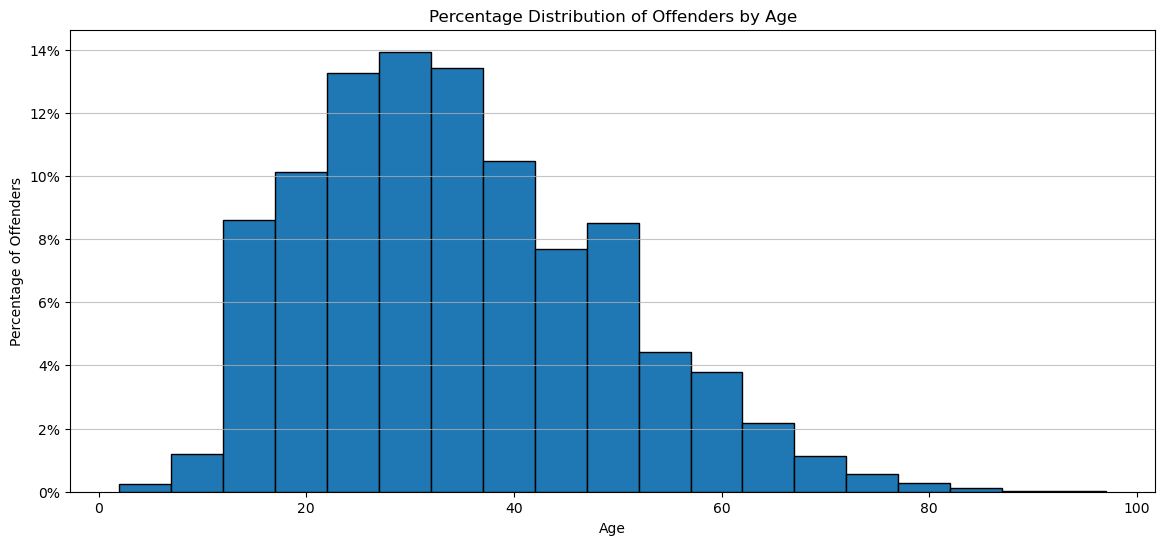

In [6]:
# Filtering offenders with age 0
df_offenders_filtered = df_offenders[df_offenders['offender_age'] > 0]

# Creating a histogram for the distribution of offender ages showing percentages
plt.figure(figsize=(14, 6))
plt.hist(df_offenders_filtered['offender_age'], bins=range(min(df_offenders_filtered['offender_age']), max(df_offenders_filtered['offender_age']) + 1, 5), edgecolor='black', weights=np.ones(len(df_offenders_filtered)) / len(df_offenders_filtered))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.title('Percentage Distribution of Offenders by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Offenders')
plt.grid(axis='y', alpha=0.75)

plt.show()


**Offender Age Distribution** The histogram peaks in the age range of late teens to mid-twenties, suggesting that the majority of offenders in the dataset are in this age group. The histogram also shows a small percentage of offenders who are under 20 years old, highlighting the presence of juvenile delinquency within the dataset.There is a small percentage of offenders that have an unknown age and are not shown in the figure. Offenders in middle age and older age brackets constitute a smaller portion of the dataset.

The concentration of offenders in the younger demographic could suggest that targeted interventions in early life stages, such as during adolescence or early adulthood, might be effective in reducing crime rates.This histogram can provide valuable insights for law enforcement agencies, policymakers, and social service organizations to understand the demographics of offenders and to design age-specific crime prevention and rehabilitation programs.

In [7]:
# Number of offenders by type of offense in each age group 
offender_counts = df_offenders_filtered.groupby(['age_group', 'offense_category_name']).size().reset_index(name='count')

print(offender_counts)

   age_group offense_category_name  count
0       0-20      Assault Offenses  10362
1       0-20   Extortion/Blackmail      1
2       0-20     Homicide Offenses     39
3       0-20     Human Trafficking      0
4       0-20  Kidnapping/Abduction     16
5       0-20               Robbery    622
6       0-20          Sex Offenses    450
7      21-40      Assault Offenses  34297
8      21-40   Extortion/Blackmail      0
9      21-40     Homicide Offenses    192
10     21-40     Human Trafficking     17
11     21-40  Kidnapping/Abduction     89
12     21-40               Robbery   1949
13     21-40          Sex Offenses    718
14     41-60      Assault Offenses  18051
15     41-60   Extortion/Blackmail      3
16     41-60     Homicide Offenses     81
17     41-60     Human Trafficking      8
18     41-60  Kidnapping/Abduction     58
19     41-60               Robbery    935
20     41-60          Sex Offenses    420
21     61-80      Assault Offenses   3765
22     61-80   Extortion/Blackmail

In [8]:
df_offenders_filtered['offense_category_name'].value_counts()

offense_category_name
Assault Offenses        66656
Robbery                  3536
Sex Offenses             1692
Homicide Offenses         331
Kidnapping/Abduction      168
Human Trafficking          25
Extortion/Blackmail         4
Name: count, dtype: int64

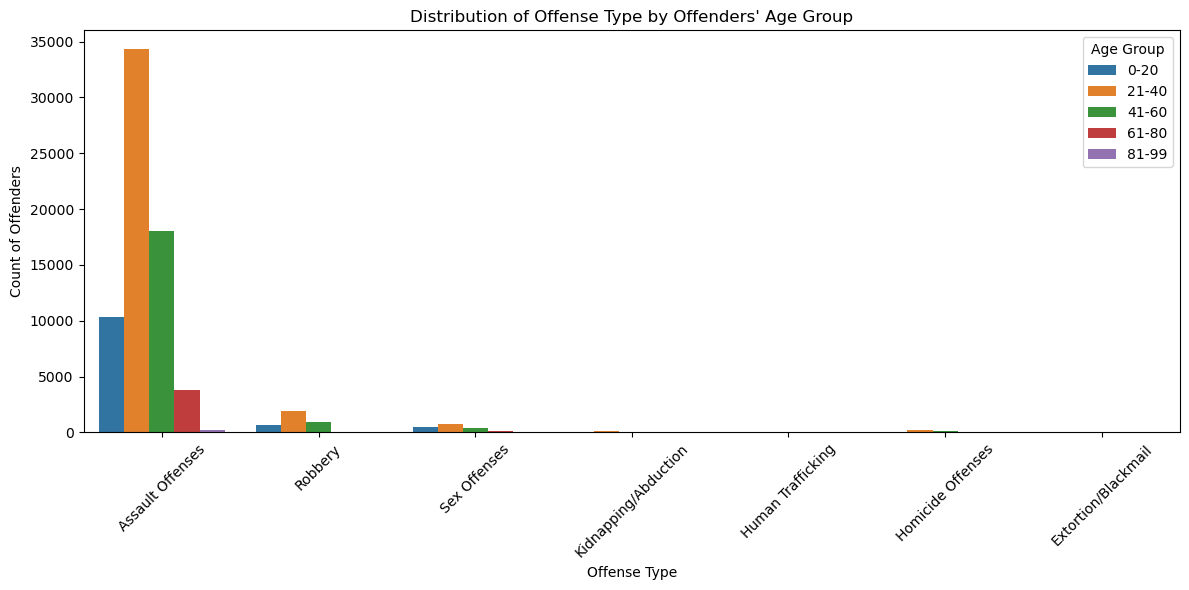

In [9]:
# Creating a count plot for the distribution of offense types by offender ages 

# Creating the count plot 
plt.figure(figsize=(12, 6))
sns.countplot(x='offense_category_name', data=df_offenders_filtered, hue='age_group', palette='tab10')
plt.title('Distribution of Offense Type by Offenders\' Age Group')
plt.xlabel('Offense Type')
plt.ylabel('Count of Offenders')
plt.xticks(rotation=45)  
plt.legend(title='Age Group')
plt.tight_layout()  
plt.show()

**Offense Types by Offender Ages** The count plot shows that the age group of 21-40 appears to be the most represented across most types of offenses, which suggests that individuals in this age range are the most likely to be offenders, according to this dataset.

The specific offense trends are: 
-Assault Offenses: This category has the highest number of offenders, particularly in the 21-40 age group.

-Sex Offenses: There is also a significant count of offenders in the 21-40 age group, followed by the 41-60 age group.

-Robbery: The 21-40 age group is notably dominant in this category, with the count for other age groups being relatively low.

-Extortion/Blackmail: While the counts are overall lower than for assault and sex offenses, the 21-40 age group still shows the highest number of offenders.

The age group of 81-99 has the lowest count of offenders across all types of offenses, which aligns with general crime trends where criminal activity tends to decrease with age.
The 0-20 age group has a noticeable presence, especially in Assault and Sex Offenses, suggesting that these types of offenses are not uncommon among younger individuals.

The presence of youth offenders in categories like Assault and Sex Offenses highlights the need for early intervention programs targeting at-risk youth to prevent the escalation of criminal behavior.
The data suggests that crime prevention and intervention strategies should be tailored to address the predominant age group of 21-40 years, focusing on the most common offenses within this group.

In [10]:
# Percentage of offenders by sex
offender_sex_count = df_offenders['offender_sex'].value_counts()
sex_percentage = df_offenders['offender_sex'].value_counts(normalize=True)*100
print(offender_sex_count)
print('-------------------')
print("Percentage Distribution of offenders by Sex:")
print(sex_percentage)

offender_sex
M    50438
F    22390
U      706
Name: count, dtype: int64
-------------------
Percentage Distribution of offenders by Sex:
offender_sex
M    68.5914
F    30.4485
U     0.9601
Name: proportion, dtype: float64


In [11]:
# Number of offenders by race
race_description_count = df_offenders['race_description'].value_counts()
print(race_description_count)

race_description
White                                        35790
Black or African American                    35362
Unknown                                       1490
Native Hawaiian or Other Pacific Islander      374
Asian                                          312
American Indian or Alaska Native               206
Name: count, dtype: int64


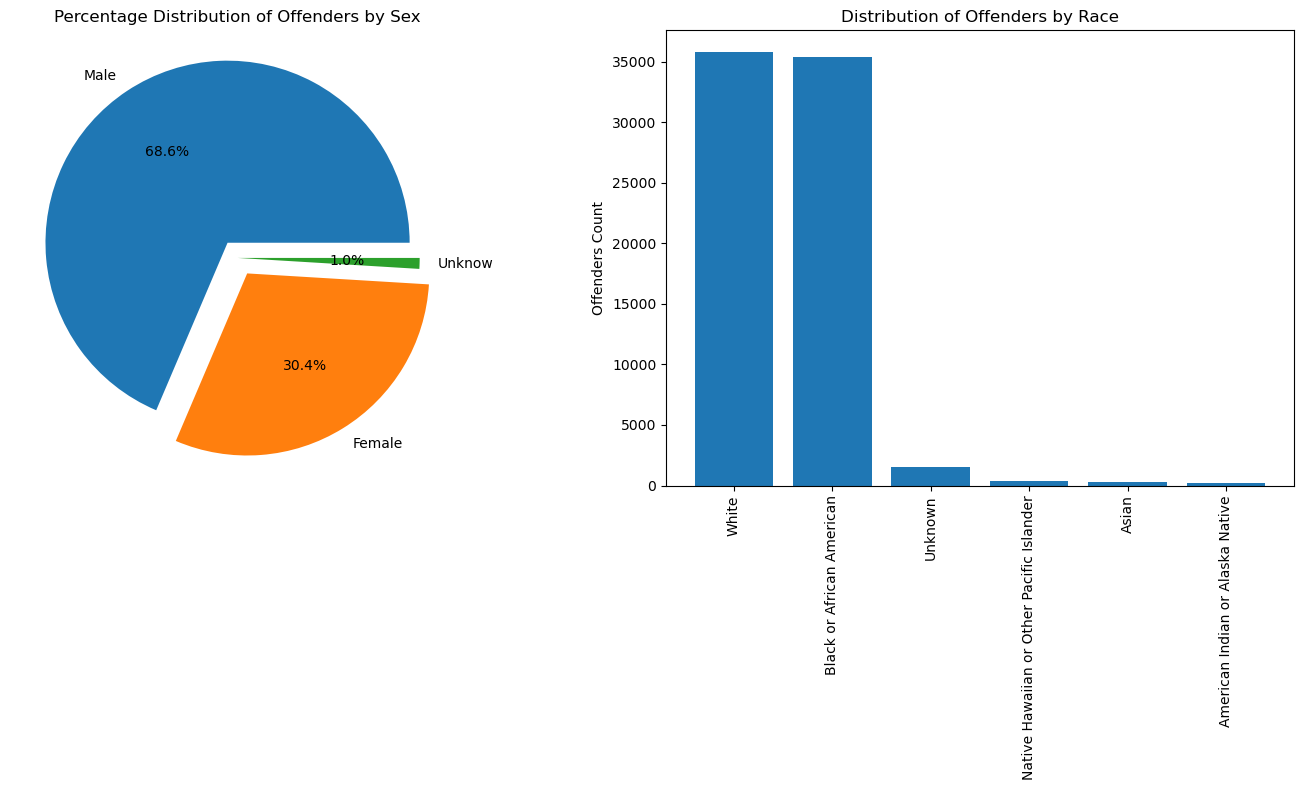

In [12]:
# Creating a pie and a bar chart for the distribution of offenders by sex and race
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,8))

# Creating the pie chart for offenders by sex
labels = ['Male', 'Female', 'Unknow']
ax1.pie(offender_sex_count, labels=labels, autopct='%1.1f%%', explode=(0.1,0.1,0))
ax1.set_title('Percentage Distribution of Offenders by Sex')

# Creating the bar chart for offenders by race
ax2.bar(race_description_count.index, race_description_count)
ax2.set_ylabel('Offenders Count')
ax2.set_title('Distribution of Offenders by Race')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Percentage Distribution of Offenders by Sex (Pie Chart)**
The pie chart indicates a significant gender disparity among offenders, with males constituting a majority at 68.6%.
Females account for 30.4% of the offenders, which is less than half of the male offender proportion. A small fraction (1.0%) of the data has an unspecified gender, labeled as 'Unknown'. This could be due to reporting issues or a deliberate choice to not disclose gender.
The gender distribution suggests that males are significantly more likely to be offenders, or at least more likely to be identified as offenders in this dataset.

**Distribution of Offenders by Race (Bar Chart)**
The bar chart shows that individuals identified as White make up the largest count of offenders, followed closely by those identified as Black or African American.There is a noticeable decrease in counts for individuals identified as Native Hawaiian or Other Pacific Islander, Asian, and American Indian or Alaska Native, suggesting that these racial groups have a smaller number of offenders in the dataset or are underrepresented. Similar to the 'Unknown' category for sex, there is a segment of offenders whose race is not specified.
The high counts of White and Black or African American offenders may reflect demographic proportions within the population, reporting practices, or systemic issues that lead to higher incidences or reporting of crimes among these groups.
The smaller counts for other racial groups could be indicative of their demographic proportions in the general population or could point to potential disparities in crime reporting or recording.

In [13]:
# Number of offenders by city
city_counts = df_offenders['city_name'].value_counts()
print(city_counts)

city_name
Jacksonville, FL                           24317
Miami-Fort Lauderdale-Pompano Beach, FL    17250
Tampa-St. Petersburg-Clearwater, FL        11976
Naples-Marco Island, FL                     4424
Ocala, FL                                   4373
North Port-Sarasota-Bradenton, FL           2926
Tallahassee, FL                             2613
Orlando-Kissimmee-Sanford, FL               1746
Not Specified                               1375
Punta Gorda, FL                             1085
Crestview-Fort Walton Beach-Destin, FL       566
Gainesville, FL                              349
The Villages, FL                             299
Cape Coral-Fort Myers, FL                    218
Pensacola-Ferry Pass-Brent, FL                17
Name: count, dtype: int64


In [14]:
# Fixing multiples cities to obtain geographical coordinates 
city_name_fixed = {
    "Tampa-St. Petersburg-Clearwater, FL": "Tampa, FL",
    "Crestview-Fort Walton Beach-Destin, FL": "Destin, FL",
    "Miami-Fort Lauderdale-Pompano Beach, FL": "Miami, FL",
    "North Port-Sarasota-Bradenton, FL": "Sarasota, FL",
    "Cape Coral-Fort Myers, FL":"Cape Coral, FL",
    "Naples-Marco Island, FL": "Naples, FL",
    "Orlando-Kissimmee-Sanford, FL": "Orlando, FL",
    "Pensacola-Ferry Pass-Brent, FL": "Pensacola, FL"
}

df_offenders['city_name'] = df_offenders['city_name'].replace(city_name_fixed)

In [15]:
# Geocoding city names to obtain their geographic coordinates
geolocator = Nominatim(user_agent="offenders_by_city")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)
unique_cities = pd.DataFrame(df_offenders['city_name'].unique(), columns=['city_name'])
unique_cities['location'] = unique_cities['city_name'].apply(geocode)
unique_cities['latitude'] = unique_cities['location'].apply(lambda loc: loc.latitude if loc else None)
unique_cities['longitude'] = unique_cities['location'].apply(lambda loc: loc.longitude if loc else None)
unique_cities.drop('location', axis=1, inplace=True)

# New dataframe including Latitude and Longitude per City
df_offenders_geo = df_offenders.merge(unique_cities, on='city_name', how='left')

# Filtering dataframe with unique cities
print(df_offenders_geo[['city_name', 'latitude', 'longitude']].drop_duplicates(subset='city_name'))

             city_name   latitude  longitude
0           Naples, FL  26.142198 -81.794294
2     Jacksonville, FL  30.332184 -81.655651
12        Sarasota, FL  27.336581 -82.530855
13           Miami, FL  25.774173 -80.193620
18       Not Specified        NaN        NaN
21     Gainesville, FL  29.651968 -82.324985
26           Ocala, FL  29.187199 -82.140092
30           Tampa, FL  27.947760 -82.458444
33     Tallahassee, FL  30.438083 -84.280933
34     Punta Gorda, FL  26.929784 -82.045366
40          Destin, FL  30.393534 -86.495783
68         Orlando, FL  28.542111 -81.379030
284   The Villages, FL  28.926998 -82.004176
2091     Pensacola, FL  30.421309 -87.216915
2457    Cape Coral, FL  26.605943 -81.980677


In [16]:
# Configuring the map plot
city_counts_geo = df_offenders_geo.groupby('city_name').size().reset_index(name='offender_count')
df_offenders_geo_merged = pd.merge(city_counts_geo, df_offenders_geo[['city_name', 'latitude', 'longitude']].drop_duplicates(), on='city_name')
df_offenders_geo_merged = df_offenders_geo_merged.dropna(subset=['latitude','longitude'])

# Calculating sizes as the square root of offender_count for point size
sizes = np.sqrt(df_offenders_geo_merged["offender_count"]) * 3  

# Creating the map plot
map_plot = df_offenders_geo_merged.hvplot.points(
    "longitude", 
    "latitude", 
    geo=True,
    alpha=0.8,
    tiles="OSM",
    marker='square',
    line_color='black',
    responsive=True,
    size=sizes,
    title='Offenders by City',
    xlabel="Longitude",
    ylabel="Latitude",
    color="city_name",
    #frame_width=700,
    #frame_height=500,
    hover_cols=["city_name", "offender_count"]
)
# Moving the legend position
map_plot = map_plot.opts(
    hv.opts.Points(legend_position='bottom_left') 
)
# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (city_name,_size,offender_count)

In [17]:
# Exporting the map to html
#hvplot.save(map_plot, 'map.html', fmt='html')

# Then exporting to PNG 
#hvplot.save(map_plot, 'map.png', fmt='png')

**Ofenders by City** Based on the dataset, Jacksonville, Miami, and Tampa have the highest number of offenders, significantly more than the other cities listed. Cities like Naples, Ocala, Sarasota, Tallahassee, and Orlando have moderate offender counts.Cities such as Destin, Gainesville, The Villages, Cape Coral, and Pensacola have relatively low offender counts. Pensacola, in particular, has a notably lower count than the others.There is a notable number of offenders (1,375) for whom the city is not specified, which could indicate data recording issues or cases where the location of the offense is unknown or not applicable.   

Policymakers might use this data to develop targeted crime prevention and intervention strategies that are tailored to the specific needs of each city.

Public awareness campaigns and community engagement efforts could be focused on areas with higher crime rates to foster collaboration between residents, law enforcement, and local government.

The data may serve as a starting point for more detailed research into the causes of crime, the effectiveness of law enforcement strategies, and the socio-economic characteristics of each region.